# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# Importing the library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading data set
loan_df=pd.read_csv("loan_prediction.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan_df.shape   ## to check how many rows and columns in a data set

(614, 13)

 Observation : In this data set there are 614 rows and 13 columns.

In [5]:
loan_df.dtypes    ## it will show the datatypes of the columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# In this data set there are some categorical featurs and some are numerical features.

In [7]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
## These all are columns of this dataset.

In [9]:
loan_df.info()   ## it will give the information about dataset like is there any null values or not in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking null values

In [10]:
loan_df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

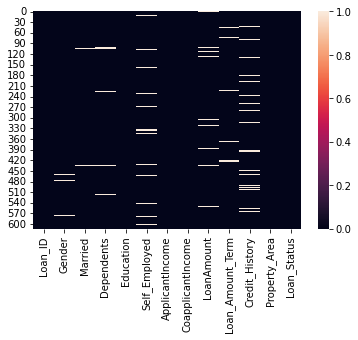

In [13]:
sns.heatmap(loan_df.isnull())

# Filling the missing values by mean and mode

In [14]:
## filling the missing values for numerical values by mean

loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean())

In [16]:

# filling the missing values for categorical values by mode
loan_df['Gender'] = loan_df["Gender"].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df["Married"].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df["Dependents"].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df["Self_Employed"].fillna(loan_df['Self_Employed'].mode()[0])

In [17]:
## Checking the null values

<AxesSubplot:>

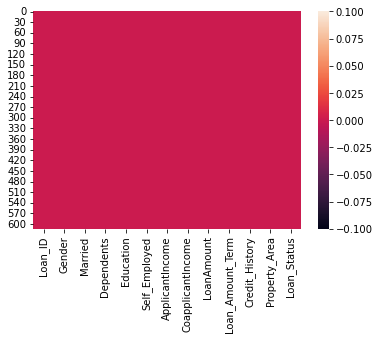

In [18]:
sns.heatmap(loan_df.isnull())

# Summary statastics

In [19]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
loan_df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [21]:
#Observation : Yes and No types of output thatmeans this data set will go under classification.

# Target/dependent variable is describe and categorical in nature

In [22]:
loan_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
##Observation : 422 people have applied for loan.

# Check Correlation

In [24]:
loan_dfcor=loan_df.corr()    ## To check the coreelation in dataset

In [25]:
loan_dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

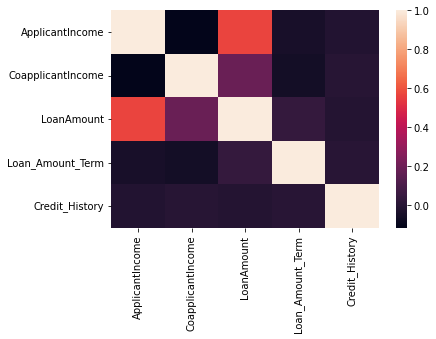

In [26]:
sns.heatmap(loan_dfcor)   ## Graphical represntation of correlation of datset by seaborn

<AxesSubplot:>

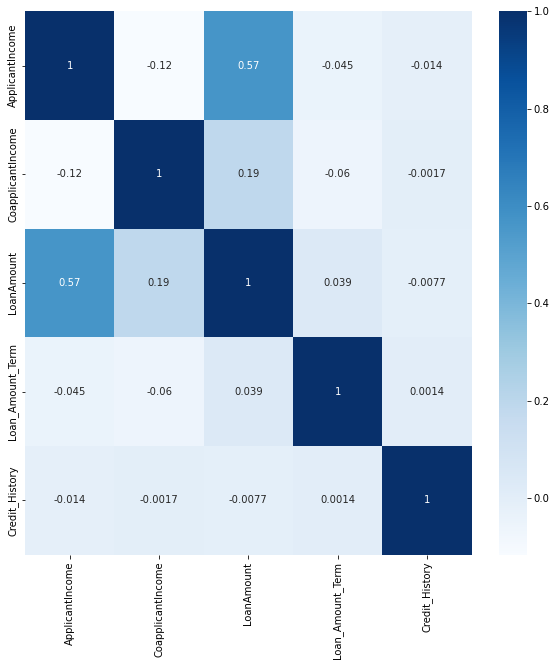

In [27]:
plt.figure(figsize=(10,10))           ### figsize=(10,10)   length,breadth
sns.heatmap(loan_dfcor,cmap='Blues',annot=True)   ## cmap='Blues'  it will represent in blue color & annot=True means it will represent the correlated value in plot.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

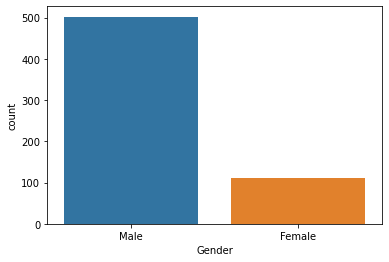

In [28]:
# categorical attributes visualization
sns.countplot(loan_df['Gender'])

In [29]:
##Observation : From above graph, it can be seen that Male candidate is more interested to take loan in comparision of Female.

<AxesSubplot:xlabel='Married', ylabel='count'>

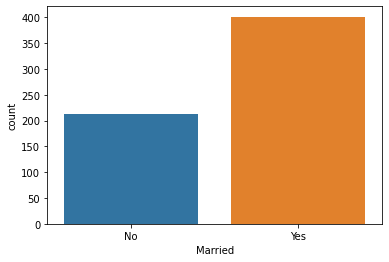

In [30]:
sns.countplot(loan_df['Married'])

In [31]:
##Observation : From above graph, it can be seen that married people are taking more loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

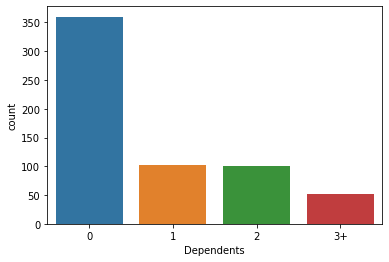

In [32]:
sns.countplot(loan_df['Dependents'])

In [33]:
##Observation : From above graph, it can be seen that if people dont have dependents so they are interested to taking loan. 

<AxesSubplot:xlabel='Education', ylabel='count'>

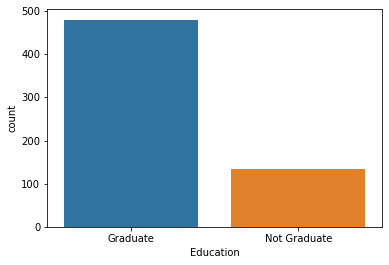

In [34]:
sns.countplot(loan_df['Education'])

In [35]:
##Observation : From above graph, it can be seen that Graduates are preferring to take loan.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

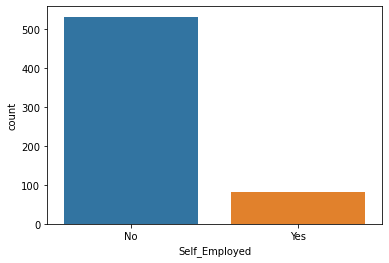

In [36]:
sns.countplot(loan_df['Self_Employed'])

In [37]:
##Observation : From above graph, it can be seen that the people who are self employed so those people are not intersted to take loan.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

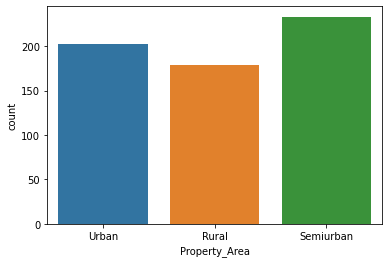

In [39]:
sns.countplot(loan_df['Property_Area'])

In [40]:
##Observation : The people who are coming from semiurban, those people is the highest in among all three property area.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

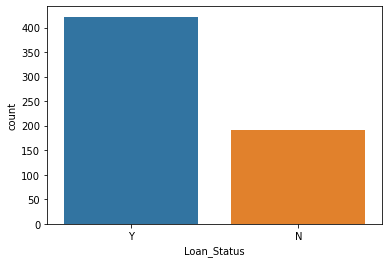

In [41]:

sns.countplot(loan_df['Loan_Status'])


# Checking for skewness

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

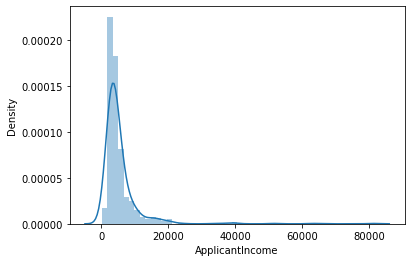

In [43]:

# numerical attributes visualization
sns.distplot(loan_df["ApplicantIncome"])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

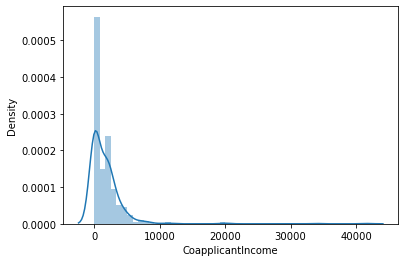

In [45]:
sns.distplot(loan_df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

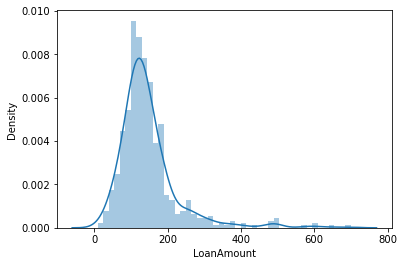

In [46]:
sns.distplot(loan_df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

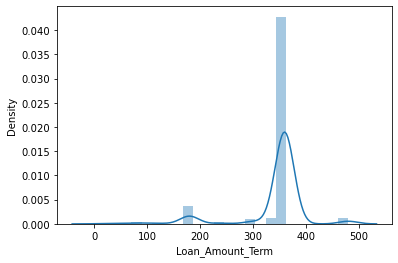

In [47]:

sns.distplot(loan_df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

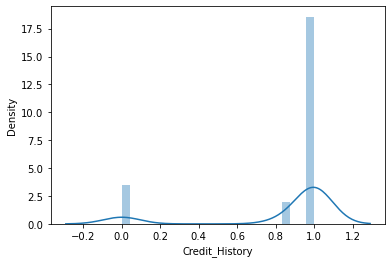

In [48]:
sns.distplot(loan_df['Credit_History'])

# Adding a new feature

In [50]:
# total income
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Removing skewness

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

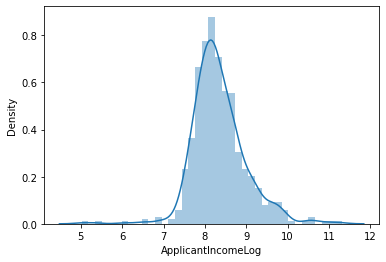

In [51]:

loan_df['ApplicantIncomeLog'] = np.log(loan_df['ApplicantIncome']+1)
sns.distplot(loan_df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

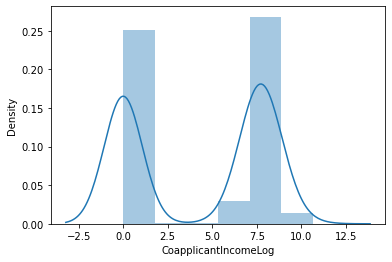

In [52]:
loan_df['CoapplicantIncomeLog'] = np.log(loan_df['CoapplicantIncome']+1)
sns.distplot(loan_df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

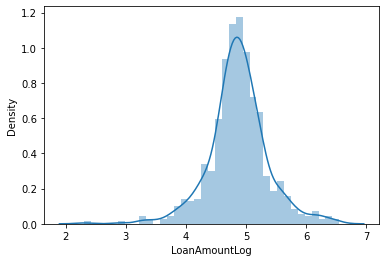

In [53]:
loan_df['LoanAmountLog'] = np.log(loan_df['LoanAmount']+1)
sns.distplot(loan_df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

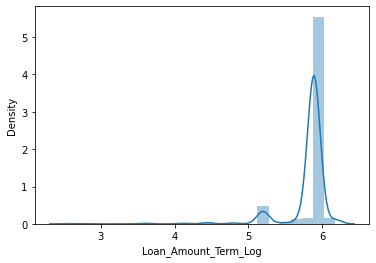

In [54]:
loan_df['Loan_Amount_Term_Log'] = np.log(loan_df['Loan_Amount_Term']+1)
sns.distplot(loan_df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

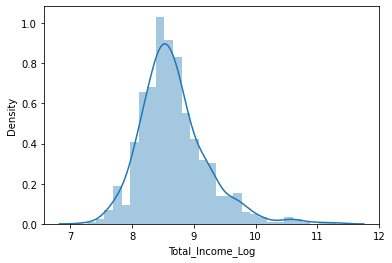

In [55]:
loan_df['Total_Income_Log'] = np.log(loan_df['Total_Income']+1)
sns.distplot(loan_df["Total_Income_Log"])

In [56]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,7.972811,0.000000,4.276666,5.888878,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,8.320448,0.000000,3.713572,5.198497,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,8.996280,5.484797,5.537334,5.888878,9.025576
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,8.933796,0.000000,5.236442,5.888878,8.933796


In [57]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan_df = loan_df.drop(columns=cols, axis=1)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


# Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_df[col] = le.fit_transform(loan_df[col])

In [59]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Box plot to check outlier

In [74]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')

<AxesSubplot:>

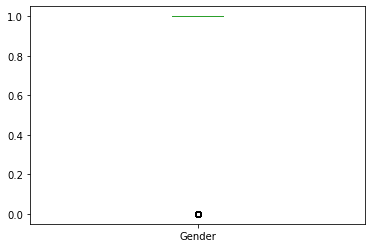

In [72]:
loan_df['Gender'].plot.box()


<AxesSubplot:>

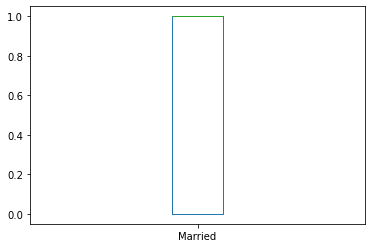

In [73]:
loan_df['Married'].plot.box()

<AxesSubplot:>

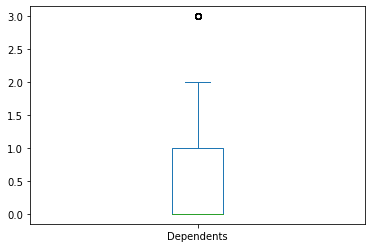

In [75]:
loan_df['Dependents'].plot.box()

<AxesSubplot:>

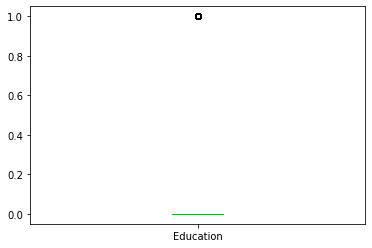

In [76]:
loan_df['Education'].plot.box()

<AxesSubplot:>

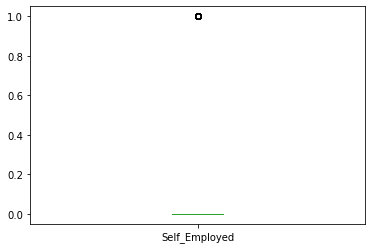

In [77]:
loan_df['Self_Employed'].plot.box()

<AxesSubplot:>

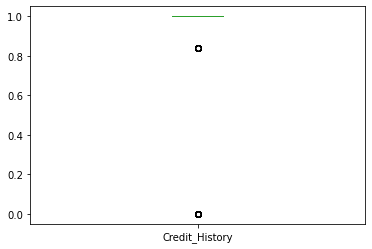

In [78]:
loan_df['Credit_History'].plot.box()

<AxesSubplot:>

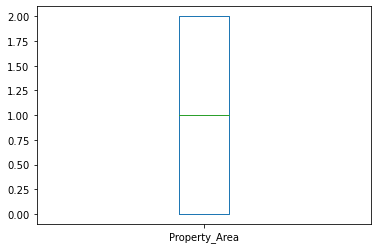

In [79]:
loan_df['Property_Area'].plot.box()

<AxesSubplot:>

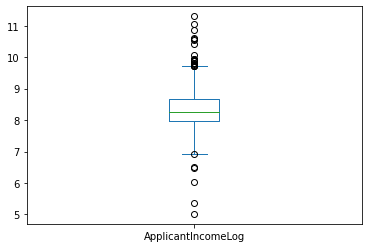

In [80]:
loan_df['ApplicantIncomeLog'].plot.box()

<AxesSubplot:>

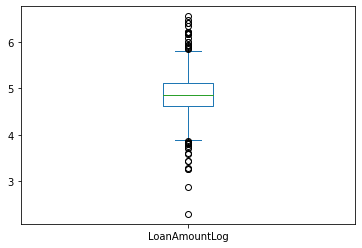

In [81]:
loan_df['LoanAmountLog'].plot.box()

<AxesSubplot:>

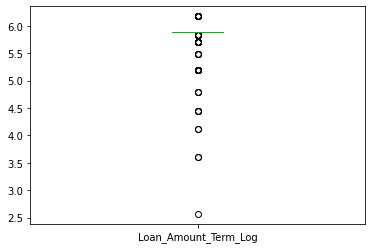

In [82]:
loan_df['Loan_Amount_Term_Log'].plot.box()

<AxesSubplot:>

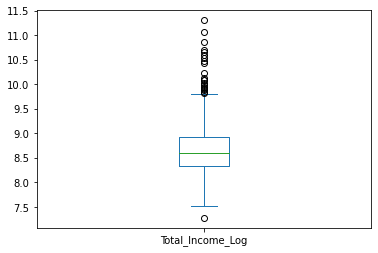

In [83]:
loan_df['Total_Income_Log'].plot.box()

In [ ]:
Observation : some attributes have outliers so it can be removed by zscore method.

# Remove outliers

In [60]:
import numpy as np

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(loan_df))
z

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.451640,1.223298,0.674519,0.516186,0.249219,0.269941,0.008426
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.451640,1.318513,1.482537,0.137806,0.022525,0.269941,0.082860
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.451640,1.223298,0.674519,0.519479,1.356846,0.269941,1.217299
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.451640,1.223298,0.674519,0.751605,0.152922,0.269941,0.301306
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.451640,1.223298,0.674519,0.555727,0.173033,0.269941,0.055223
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.451640,1.318513,0.674519,0.572062,1.210254,0.269941,1.279531
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.451640,1.318513,0.674519,0.032679,2.357140,1.962012,0.641164
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.451640,1.223298,0.674519,1.015921,1.357423,0.269941,0.653664
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.451640,1.223298,0.674519,0.918972,0.744578,0.269941,0.485128


In [62]:
threshold=3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 155, 171, 171,
       171, 183, 183, 185, 185, 216, 242, 262, 313, 333, 333, 369, 409,
       409, 443, 443, 468, 495, 497, 546, 555, 561, 568, 575, 581, 585,
       600, 600], dtype=int64), array([ 9, 10, 10,  9, 10,  9,  9, 10,  8,  9, 11,  8,  9, 11,  8, 11,  8,
       11,  8, 10, 10, 10,  8, 11,  9,  8, 11,  8, 11,  8, 10, 10, 10,  9,
        9,  9, 10, 11, 10,  8, 11], dtype=int64))


In [63]:
z.iloc[14,9]

4.033800850275467

In [64]:
loan_df1=loan_df[(z<3).all(axis=1)]

In [65]:
loan_df1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933796


# Train_Test_Split_data

In [85]:
# specify input and output attributes
X = loan_df1.drop(columns=['Loan_Status'], axis=1)
Y = loan_df1['Loan_Status']

In [86]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [95]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.8352272727272727 random_state 1
accuracy 0.8352272727272727 random_state 2
accuracy 0.8011363636363636 random_state 3
accuracy 0.8409090909090909 random_state 4
accuracy 0.8465909090909091 random_state 5
accuracy 0.8125 random_state 6
accuracy 0.8295454545454546 random_state 7
accuracy 0.8181818181818182 random_state 8
accuracy 0.8125 random_state 9
accuracy 0.8409090909090909 random_state 10
accuracy 0.8068181818181818 random_state 11
accuracy 0.8295454545454546 random_state 12
accuracy 0.8068181818181818 random_state 13
accuracy 0.8238636363636364 random_state 14
accuracy 0.7840909090909091 random_state 15
accuracy 0.8295454545454546 random_state 16
accuracy 0.8409090909090909 random_state 17
accuracy 0.7897727272727273 random_state 18
accuracy 0.8465909090909091 random_state 19
accuracy 0.7897727272727273 random_state 20
accuracy 0.7840909090909091 random_state 21
accuracy 0.8011363636363636 random_state 22
accuracy 0.8181818181818182 random_state 23
accuracy 0.8352272727

In [96]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8920454545454546  on Random_state 102


In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=102)

In [135]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


--------------Result of LogisticRegression---------------------
Accuracy 89.20454545454545
[[ 22  19]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        41
           1       0.88      1.00      0.93       135

    accuracy                           0.89       176
   macro avg       0.94      0.77      0.82       176
weighted avg       0.91      0.89      0.88       176

--------------Result of DecisionTreeClassifier---------------------
Accuracy 71.5909090909091
[[ 24  17]
 [ 33 102]]
              precision    recall  f1-score   support

           0       0.42      0.59      0.49        41
           1       0.86      0.76      0.80       135

    accuracy                           0.72       176
   macro avg       0.64      0.67      0.65       176
weighted avg       0.76      0.72      0.73       176

--------------Result of RandomForestClassifier---------------------
Accuracy 84.0909090909091
[[ 22  19]
 [  9 126]

# Cross validation 

In [106]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.8174272055627988
Cross Validation score of Decision Tree Classifier :  0.7355497609734898
Cross Validation score of Random Forest Classifier :  0.7935535274518325
Cross Validation score of SVC :  0.7048095031145879
Cross Validation score of KNeighbors classifier :  0.7628132695929306
Cross Validation score of GaussianNB :  0.7628132695929306


# Hyperparameter Tunning with GridSearchCV

In [107]:
RandomForestClassifier()

RandomForestClassifier()

In [124]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[100,200,300,400,500],
            'criterion':['gini','entropy']}

In [125]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto'}

In [126]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [127]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='auto')

In [128]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8522727272727273

# AUC_ROC CURVE

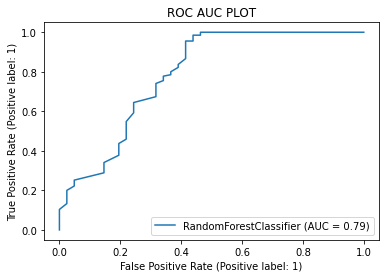

In [129]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# AdaBoostClassifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 83.52272727272727
[[ 23  18]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        41
           1       0.87      0.92      0.90       135

    accuracy                           0.84       176
   macro avg       0.77      0.74      0.75       176
weighted avg       0.83      0.84      0.83       176



# Cross validation with AdaBoost

In [131]:
scr7=cross_val_score(ad,X,Y,cv=5)
print("Cross Validation score of AdaBoostClassifier : ",scr7.mean())

Cross Validation score of AdaBoostClassifier :  0.7782268578878748


In [132]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 82.38636363636364
[[ 24  17]
 [ 14 121]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.88      0.90      0.89       135

    accuracy                           0.82       176
   macro avg       0.75      0.74      0.75       176
weighted avg       0.82      0.82      0.82       176



# AdaBoost Classifier with Support Vector Classifier

In [133]:
from sklearn.svm import SVC
svc=SVC()

ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 76.70454545454545
[[  0  41]
 [  0 135]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.77      1.00      0.87       135

    accuracy                           0.77       176
   macro avg       0.38      0.50      0.43       176
weighted avg       0.59      0.77      0.67       176



# Conclusion

# Saving the model in pickle format

In [137]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"loan_prediction.pkl")

['loan_prediction.pkl']